This is the HW1 of the subject.

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [591]:
global orange 
global blue
global N

N = 100 # Number of initial points

orange = [] 
blue = []

w1 = 0.3
w2 = round(1.0 - w1, 2)
w3 = 0.8
w4 = round(1.0 - w3, 2)

classes = 2

w = [w1, w2, w3, w4]
pho = [1, 1, -3, 2]

def plot(x, y, col):
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution")
    plt.scatter(x, y, color = col)
    plt.show()

def f(w, pho, str):
    f = []
    if str == 'orange':
        index = [0, 1]
    elif str == 'blue':
        index = [2, 3]        
    f.append(w[index[0]] * rand.gauss(pho[index[0]], 1))
    f.append(w[index[1]] * rand.gauss(pho[index[1]], 1))
    return f

variance_mat = np.identity(2)


After having defined the main variables and functions, the main program will be coded.

In [592]:
def main():
    global blue
    global orange
    orange = []
    blue = [] 
    for i in range(int(N/classes)):
        orange.append(f(w, pho, 'orange'))
        blue.append(f(w, pho, 'blue'))
    orange = pd.DataFrame(orange)
    blue = pd.DataFrame(blue)    

main()



orange.head()




,0,1
0,0.728669,-0.367722
1,0.036427,0.907793
2,0.377372,1.411316
3,0.242977,0.456068
4,-0.335872,0.871668


Once having sampled the Gaussian distribution and having obtained the statistical data, we will perform some Data Exploration for making sure the created data samples are right.

In [593]:
print("ORANGE CLASS DATAFAME EXPLORATION \n")
orange.describe()

ORANGE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,0.309002,0.854879
std,0.311821,0.782332
min,-0.549174,-1.424059
25%,0.147828,0.320092
50%,0.299484,0.807752
75%,0.504350,1.377658
max,0.965779,2.854540


In [594]:
print("BLUE CLASS DATAFAME EXPLORATION \n")
blue.describe()

BLUE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,-2.550231,0.363143
std,0.840368,0.225730
min,-4.765735,-0.082557
25%,-3.111491,0.195818
50%,-2.490837,0.367576
75%,-1.958278,0.531204
max,-0.915410,0.777780


After the basic data exploration, we have verified that the mean of the sampled data is the same as we expected (0.3, 0.7, 0.8 * -3 = -2.4, 0.2 * 2).
Now, we will proceed to plot the data into a 2-D map. First of all, each class individually. Then, both of them in the same 2-D plot.

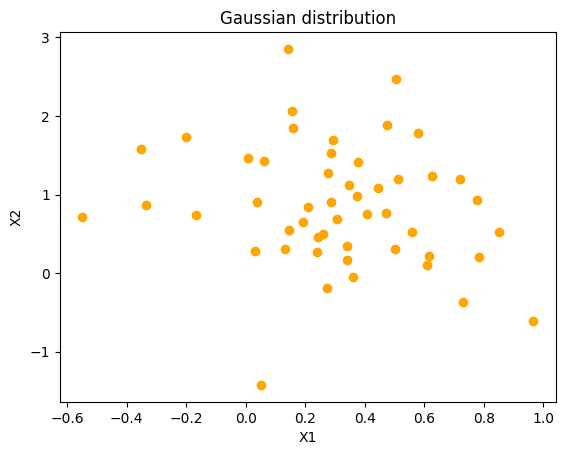

In [595]:
plot(orange.loc[:, 0], orange.loc[:, 1], 'orange')

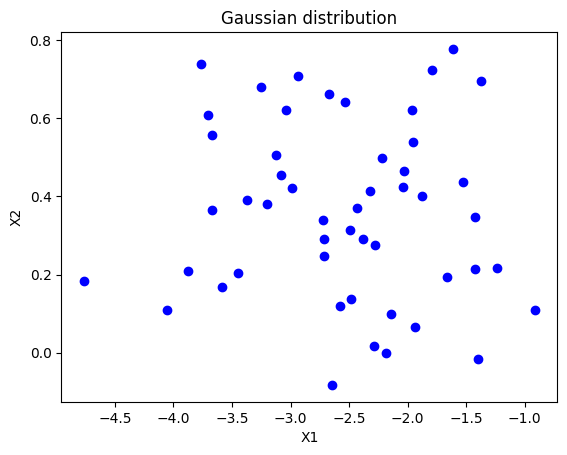

In [596]:
plot(blue.loc[:, 0], blue.loc[:, 1], 'blue')

Now, we will plot both distributions at once.

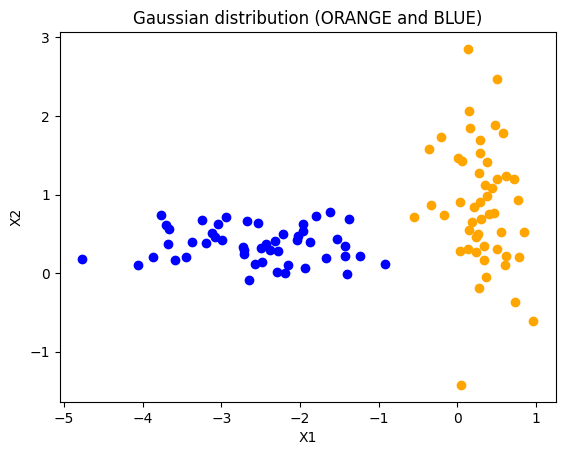

In [597]:
def double_plot(orange, blue):
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution (ORANGE and BLUE)")
    plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange')
    plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue')
    plt.show()
    
double_plot(orange, blue)

Finally, we will step by step increase the number of points created in order to see how the distribution sampling changes gets more precise. 

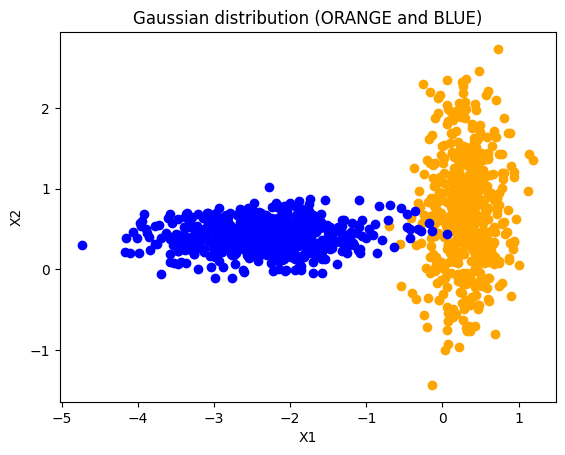

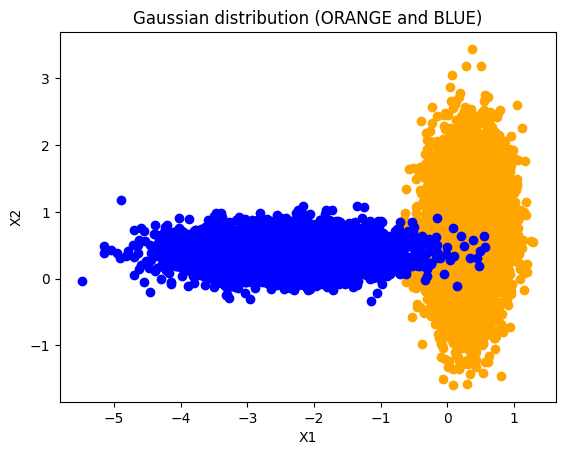

In [598]:
for i in range(2):
    N = N * 10
    main()
    double_plot(orange, blue)

2) a) k = 15

In [599]:
global k
k = 15
N = 2 * 100
main()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

size_or = np.size(orange, 0)
size_bl = np.size(orange, 0)
orange['class'] = np.ones(size_or) #orange class = 1
blue['class'] = np.zeros(size_bl) #blue class = 0

df = orange.append(blue)
df.describe()
df = df.sample(np.size(df, 0))
df.head()
knn = KNeighborsClassifier(n_neighbors = k)
  
print(df)

X_train = df.loc[:, [0, 1]]
y_train = df.loc[:, 'class']


knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_train.head(5)))

print(knn.weights)




           0         1  class
0  -2.927615  0.474625    0.0
59  0.456659  1.736721    1.0
38 -3.222380  0.394189    0.0
33 -1.783082  0.463064    0.0
87 -3.322427  0.084759    0.0
..       ...       ...    ...
3   0.507008  2.020938    1.0
99 -0.559526  0.539875    0.0
54 -2.409833  0.458440    0.0
4  -3.162200  0.319886    0.0
52 -0.416935  1.110547    1.0

[200 rows x 3 columns]
[0. 1. 0. 0. 0.]
uniform


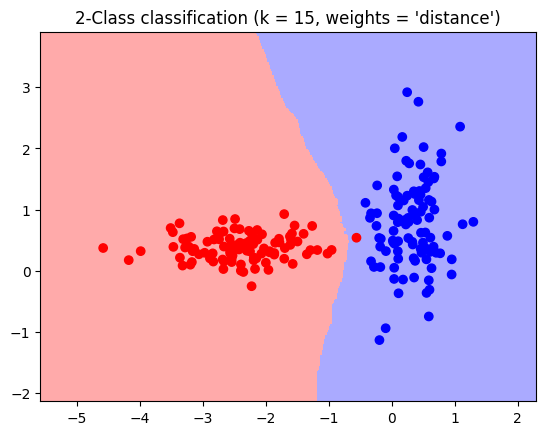

In [614]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

X = X_train
y = y_train
n_neighbors = k

# print(X)
# print(y)


margin = 0.25
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.loc[:, 0].min() - 1, X.loc[:, 0].max() + 1
    y_min, y_max = X.loc[:, 1].min() - 1, X.loc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

2) a) Using the linear model